# Bagging

Bagging can be used for regression or classification, though we will demonstrate a regression bagging model here. Since this model is based on decision tree regressors, we'll first import our {doc}`regression tree </content/c5/s2/regression_tree>` construction from the previous chapter. We'll also import numpy and the visualization packages.

In [1]:
## Import decision trees
import import_ipynb
import regression_tree as rt;

## Import numpy and visualization packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

importing Jupyter notebook from regression_tree.ipynb


We will build our bagging model on the {doc}`tips </content/appendix/data>` dataset from `scikit-learn`. The hidden code cell below loads that data and does a train-test split. 

In [2]:
## Load data
tips = sns.load_dataset('tips')
X = np.array(tips.drop(columns = 'tip'))
y = np.array(tips['tip'])

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = np.delete(X, test_idxs, 0)
y_train = np.delete(y, test_idxs, 0)
X_test = X[test_idxs]
y_test = y[test_idxs]

Now we can get right into the bagging class. To fit the `Bagger` object, we provide training data, the number of bootstraps (`B`), and size regulation parameters for the decision trees. The object then takes `B` bootstraps of the data, each time fitting a decision tree regressor. To form predictions with the `Bagger` object, we simply run test observations through each bootstrapped tree and average the fitted values. 

In [3]:
class Bagger:
    
    def fit(self, X_train, y_train, B, max_depth = 100, min_size = 2, seed = None):
        
        self.X_train = X_train
        self.N, self.D = X_train.shape
        self.y_train = y_train
        self.B = B
        self.seed = seed
        self.trees = []
        
        np.random.seed(seed)
        for b in range(self.B):
            
            sample = np.random.choice(np.arange(self.N), size = self.N, replace = True)
            X_train_b = X_train[sample]
            y_train_b = y_train[sample]
            
            tree = rt.DecisionTreeRegressor()
            tree.fit(X_train_b, y_train_b, max_depth = max_depth, min_size = min_size)
            self.trees.append(tree)
            
        
    def predict(self, X_test):
        
        y_test_hats = np.empty((len(self.trees), len(X_test)))
        for i, tree in enumerate(self.trees):
            y_test_hats[i] = tree.predict(X_test)
        
        return y_test_hats.mean(0)
        

We can now fit the bagging model and display the observed versus fitted values. 

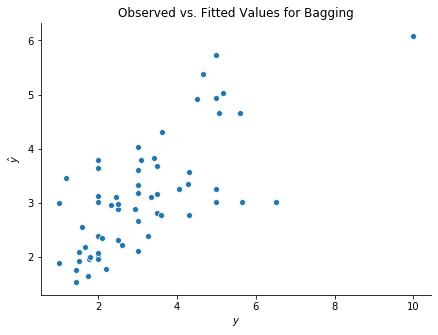

In [4]:
## Build model
bagger = Bagger()
bagger.fit(X_train, y_train, B = 30, max_depth = 20, min_size = 5, seed = 123)
y_test_hat = bagger.predict(X_test)

## Plot
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(y_test, y_test_hat)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'Observed vs. Fitted Values for Bagging')
sns.despine()